# ML for NLP









## Problem statment:
The user’s opinion of the service or product is one of the most important things that companies must study in order to develop the product in a way that suits users in order to sustain users and increase the user segment.
Since we are in the age of data, an artificial intelligence model will be created using machine learning techniques to perform sentiment analysis towards movies.

# Objective
Make a ML model to predict the sentiment (positive or negative) for any movie feedback/review.

## Data
referance for the data and to have more information about the data.
http://ai.stanford.edu/~amaas/data/sentiment/

In [40]:
# import laibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Study Data and EDA

In [41]:
df=pd.read_csv("/content/moviereviews.csv")
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


From the head of the data, we have one feature, which is the review of the movie, and the label, which contains the review for the movie.

In [42]:
df.describe()

,label,review
count,2000,1965
unique,2,1939
top,neg,
freq,1000,27


from the count, the review have a missing data, and the unique show there duplicated data

In [44]:
# check the missing values

In [43]:
df.isnull().sum()

label      0
review    35
dtype: int64

There a 35 missing data in the review data

In [45]:
null_data = df[df.isnull().any(axis=1)]
null_data

,label,review
140,pos,NaN
208,pos,NaN
270,neg,NaN
334,neg,NaN
448,neg,NaN
522,neg,NaN
606,pos,NaN
696,neg,NaN
728,pos,NaN
738,neg,NaN


In [46]:
# remove this missing data
df=df.dropna()

In [47]:
#re check missing data
df.isnull().sum()

label     0
review    0
dtype: int64

In [48]:
#check empty review
df['review'].str.isspace().sum() 

27

In [49]:
space=df[df['review'].str.isspace()]
space

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


Delete the review which have spaces reviews

In [50]:
df = df[~df['review'].str.isspace()]

In [51]:
df['review'].str.isspace().sum() 

0

Check the duplicated

In [52]:
df.duplicated().sum()

0

There no duplicated data

**Now, show the label count values.**

In [53]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

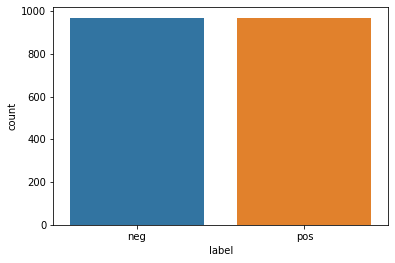

In [54]:
sns.countplot(x='label',data=df) 

**The data is balance**

# Convert data to BoW

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
sparse_mat = cv.fit_transform(df['review'])
sparse_mat.todense() 

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [56]:
# most frequancy words for negative feedback
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
# most frequancy words for positive feedback
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Model

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [59]:
#  label data
data = df[['label','review']]
y = df['label']
X = df['review']

In [60]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
# scale data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# build model

In [62]:
# NB model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [63]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [64]:
# SVC model
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [65]:
# evaluate
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


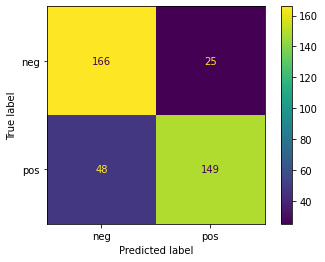

In [66]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


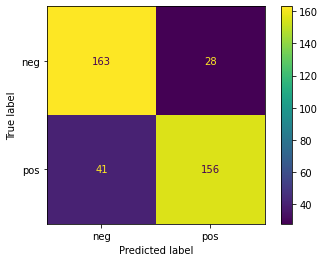

In [67]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


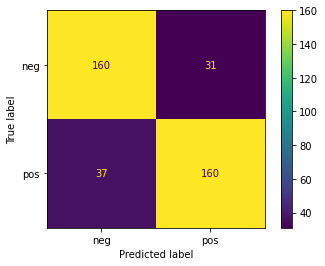

In [68]:
print('SVC')
report(svc)

**The best model from this three models is SVC but there some close reading to each other so the grid search will be apply to find best parameter for each model and re Evaluate each model then select the best one .**

In [69]:
# Grid Search to find best parameters for logistic regression
# the parameters we can check
#C=0.001,0.01,0.1,1 , solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, max_iter : int, default=100

In [70]:
param_grid = {'C':[0.001,0.01,0.1,1],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter':[100,500,1000]}

from sklearn.model_selection import GridSearchCV

grid_model_log = GridSearchCV(estimator=log,
                          param_grid=param_grid)


grid_model_log.fit(X_train_tfidf,y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [71]:
grid_model_log.best_estimator_ 

LogisticRegression(C=1, solver='newton-cg')

In [72]:
grid_model_log.best_params_ 

{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}

**this the same default parameters**

In [73]:
# Grid Search to find best parameters for SVC
# the parameters we can check
#penalty : {'l1', 'l2'}, default='l2', loss : {'hinge', 'squared_hinge'}, default='squared_hinge', C : float, default=1.0

param_grid = {'C':[0.001,0.01,0.1,1,10],
              'penalty':['l1', 'l2'],
              'loss':['hinge', 'squared_hinge'],
              'max_iter':[100,500]}

grid_model_svc = GridSearchCV(estimator=svc,
                          param_grid=param_grid)


grid_model_svc.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [100, 500], 'penalty': ['l1', 'l2']})

In [74]:
grid_model_svc.best_params_ 

{'C': 10, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l2'}

In [75]:
#Just the C value change the other parameters as default
svc = LinearSVC(C=10.0)
svc.fit(X_train_tfidf,y_train)

LinearSVC(C=10.0)

SVC
              precision    recall  f1-score   support

         neg       0.82      0.83      0.82       191
         pos       0.83      0.82      0.83       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


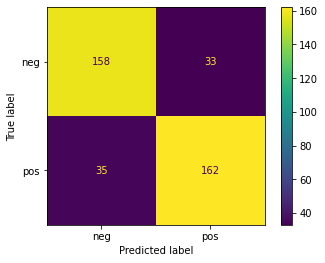

In [76]:
print('SVC')
report(svc)

**its better! but not so much .**

## Trying the Bagging and Boost models

In [77]:
#DT
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() 
DT.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [78]:
#RF
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
RF.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [79]:
#adaBoost
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=1)
Ada.fit(X_train_tfidf,y_train)

AdaBoostClassifier(n_estimators=1)

In [80]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train_tfidf,y_train)

GradientBoostingClassifier()

DT
              precision    recall  f1-score   support

         neg       0.62      0.62      0.62       191
         pos       0.63      0.63      0.63       197

    accuracy                           0.62       388
   macro avg       0.62      0.62      0.62       388
weighted avg       0.62      0.62      0.62       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


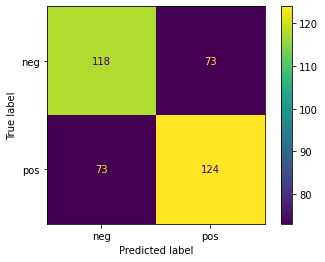

In [81]:
print('DT')
report(DT)

RF
              precision    recall  f1-score   support

         neg       0.66      0.83      0.73       191
         pos       0.78      0.58      0.66       197

    accuracy                           0.70       388
   macro avg       0.72      0.71      0.70       388
weighted avg       0.72      0.70      0.70       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


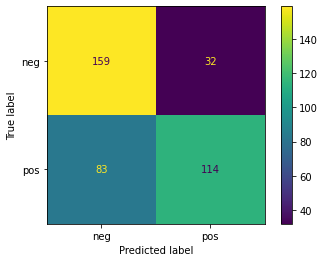

In [82]:
print('RF')
report(RF)

Ada
              precision    recall  f1-score   support

         neg       0.69      0.48      0.57       191
         pos       0.61      0.80      0.69       197

    accuracy                           0.64       388
   macro avg       0.65      0.64      0.63       388
weighted avg       0.65      0.64      0.63       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


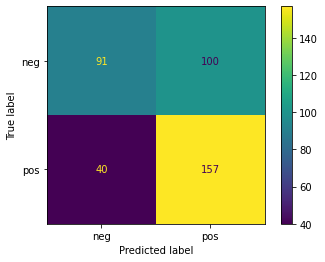

In [83]:
print('Ada')
report(Ada)

GB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         neg       0.78      0.83      0.81       191
         pos       0.83      0.78      0.80       197

    accuracy                           0.80       388
   macro avg       0.81      0.80      0.80       388
weighted avg       0.81      0.80      0.80       388



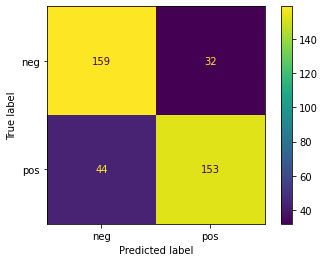

In [84]:
print('GB')
report(GB)

In [ ]:
# the Gradient Boost is the best model let us find best parameters for it
#loss : {'deviance', 'exponential'}, default='deviance' , learning_rate : float, default=0.1 , n_estimators : int, default=100, max_depth : int, default=3
#max_features : {'auto', 'sqrt', 'log2'}

param_grid = {'learning_rate':[0.01,0.1],
              'n_estimators':[100,500],
              'max_depth':[3,5]}

grid_model_GB = GridSearchCV(estimator=GB,
                          param_grid=param_grid)


grid_model_GB.fit(X_train_tfidf,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 500]})

In [ ]:
grid_model_GB.best_params_ 

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [ ]:
# build GB with the new parameters, the n_estimators: 500 change the other as the default
# Gradient Boosting
GB=GradientBoostingClassifier(n_estimators=500)
GB.fit(X_train_tfidf,y_train)

GradientBoostingClassifier(n_estimators=500)

GB
              precision    recall  f1-score   support

         neg       0.80      0.86      0.83       191
         pos       0.86      0.79      0.82       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


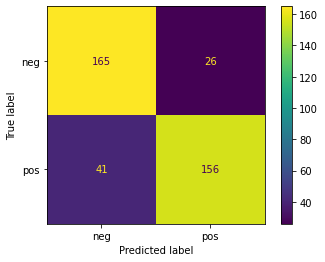

In [ ]:
print('GB')
report(GB)

**From the previoues the best model and more simple one is the scv, so the final model will deploy using it .**

# Final Model

In [85]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),
                             ('svc',LinearSVC(C=10.0))])


pipe.fit(df['review'],df['label']) 

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC(C=10.0))])

In [86]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                             ('svc',LinearSVC(C=10.0))])




In [87]:
pipe.fit(df['review'],df['label']) 
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['pos'], dtype=object)

**By train the model in all data the model accuracy become much better.**

In [88]:
#saving the model
import joblib
joblib.dump(pipe,'final_model.pkl') # save model as pkl file

joblib.dump(list(["review"]),'column_names.pkl') # save features names

['column_names.pkl']

In [89]:
col_names = joblib.load('column_names.pkl')
loaded_model = joblib.load('final_model.pkl')


In [90]:
new_tweet = ['good flight']
loaded_model.predict(new_tweet)

array(['pos'], dtype=object)